# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1273]:
#Type your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [1274]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [1275]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [1276]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [1277]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

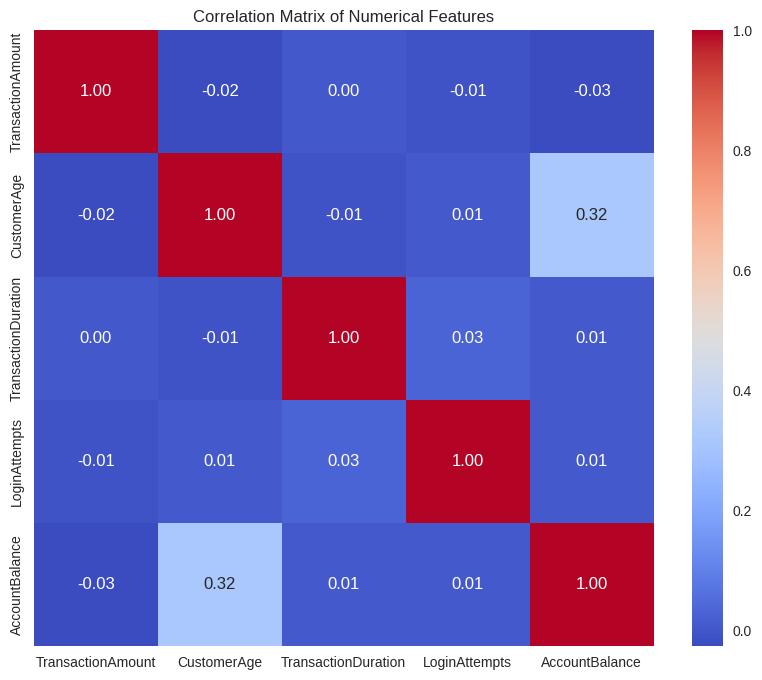

In [1278]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
# Pilih hanya kolom numerik untuk menghitung korelasi
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Hitung matriks korelasi
correlation_matrix = numerical_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Histograms for Numerical Columns:


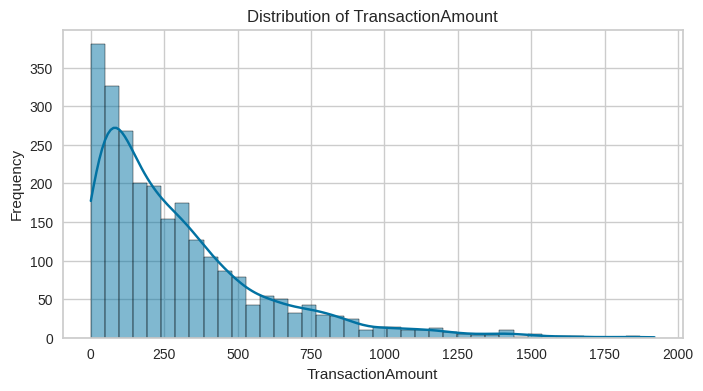

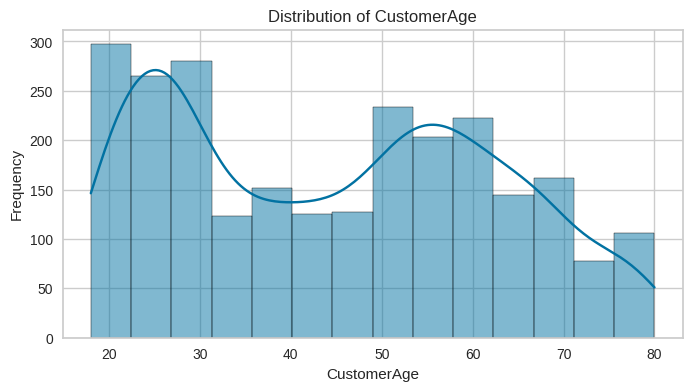

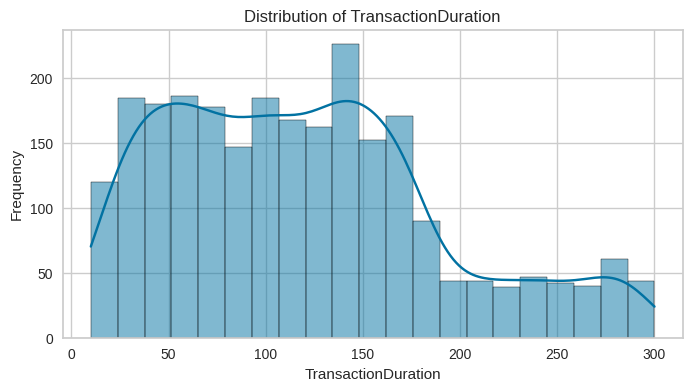

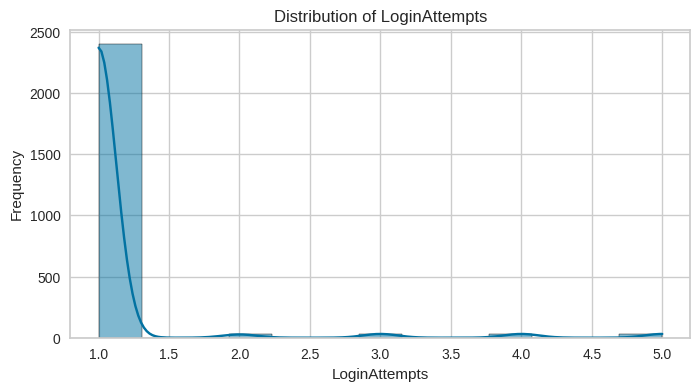

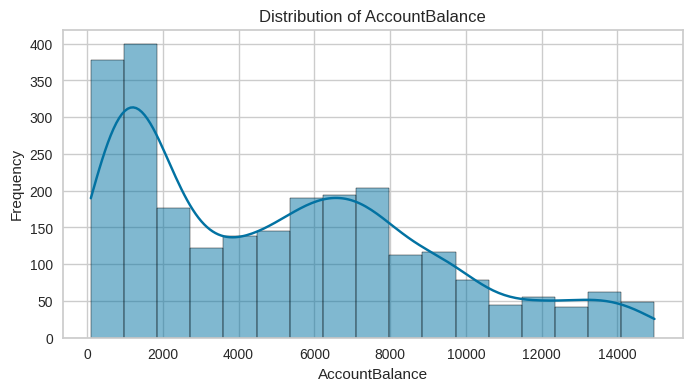


Bar Plots for Categorical Columns:


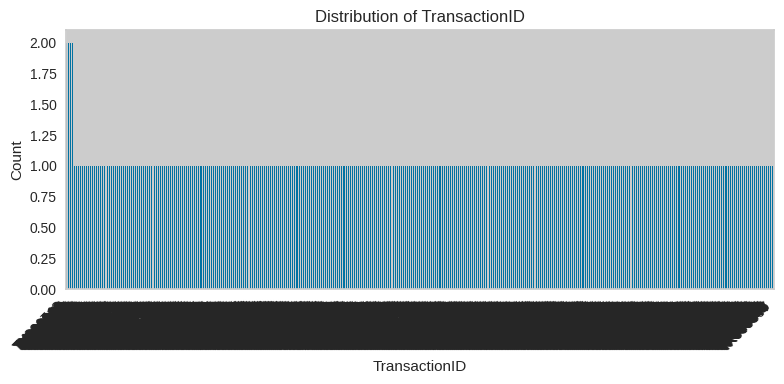

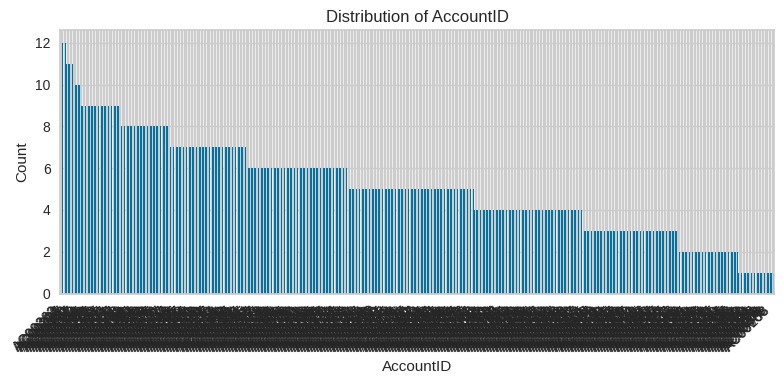

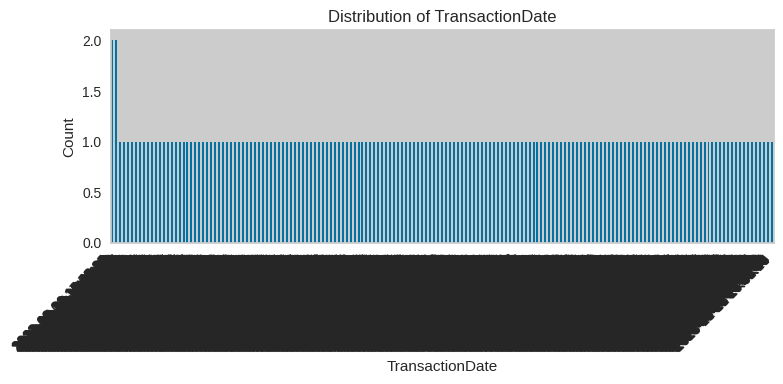

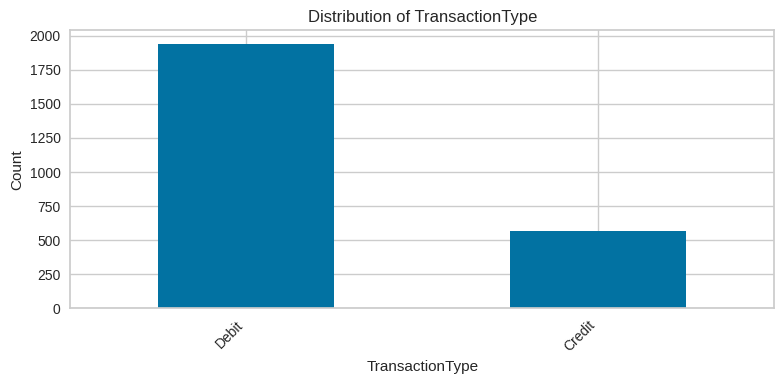

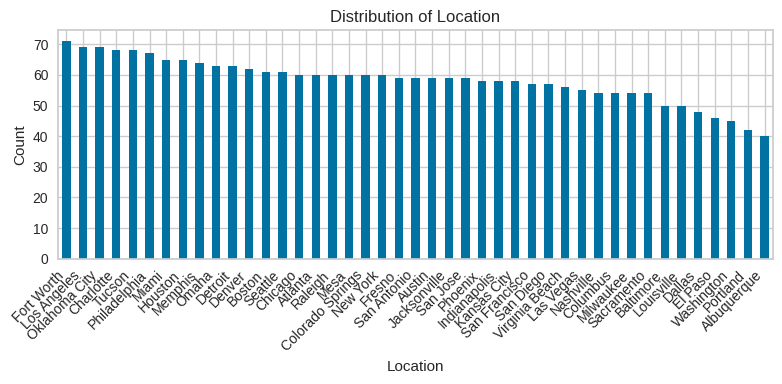

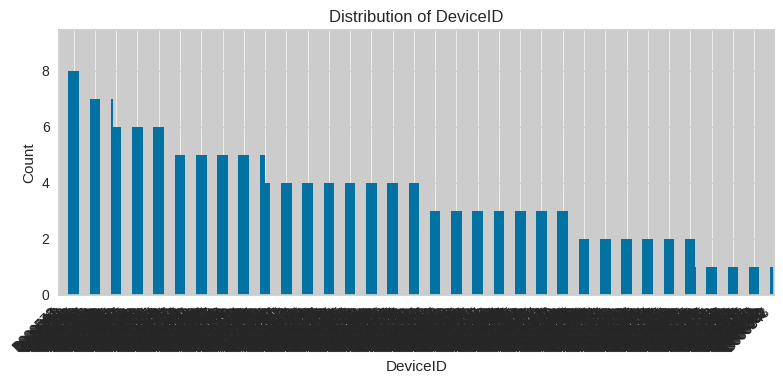

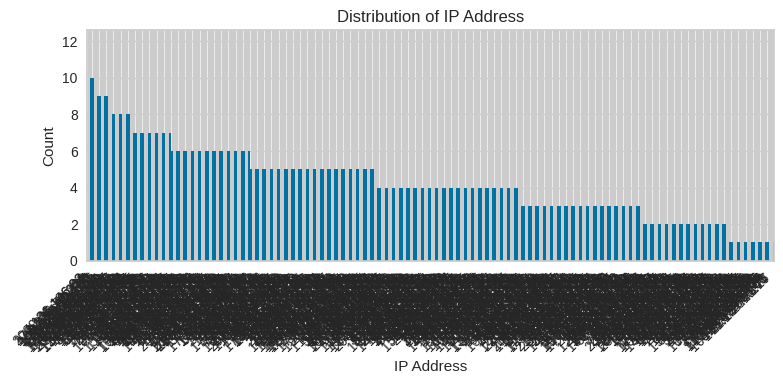

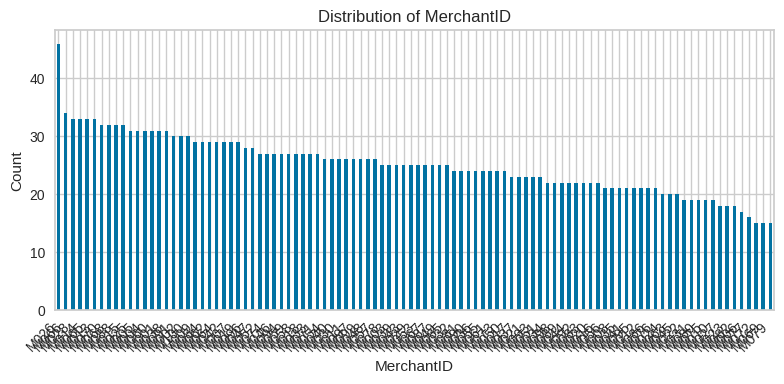

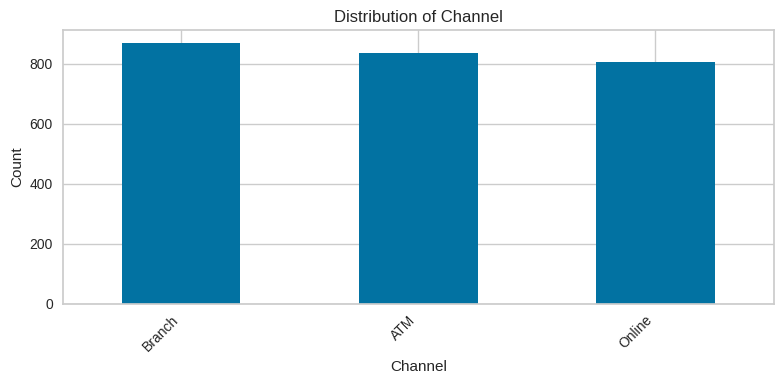

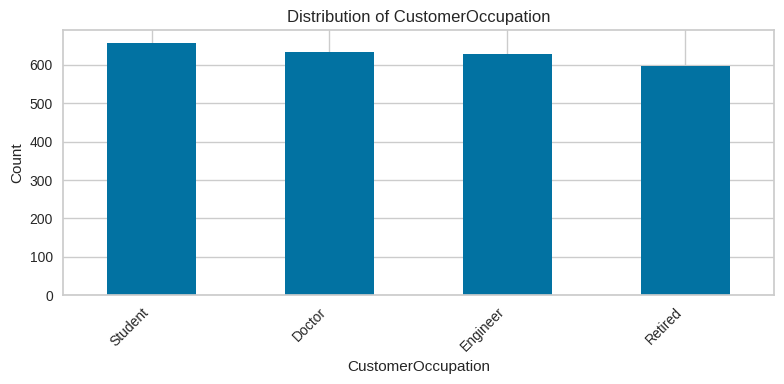

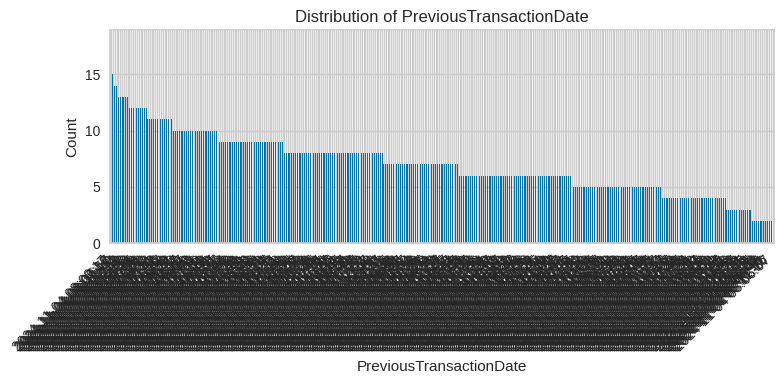

In [1279]:
# Menampilkan histogram untuk semua kolom numerik maupun kategorikal (Opsional Skilled 1)
# Pilih kolom numerik dan kategorikal
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Tampilkan histogram untuk kolom numerik
print("Histograms for Numerical Columns:")
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Tampilkan bar plot untuk kolom kategorikal
print("\nBar Plots for Categorical Columns:")
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

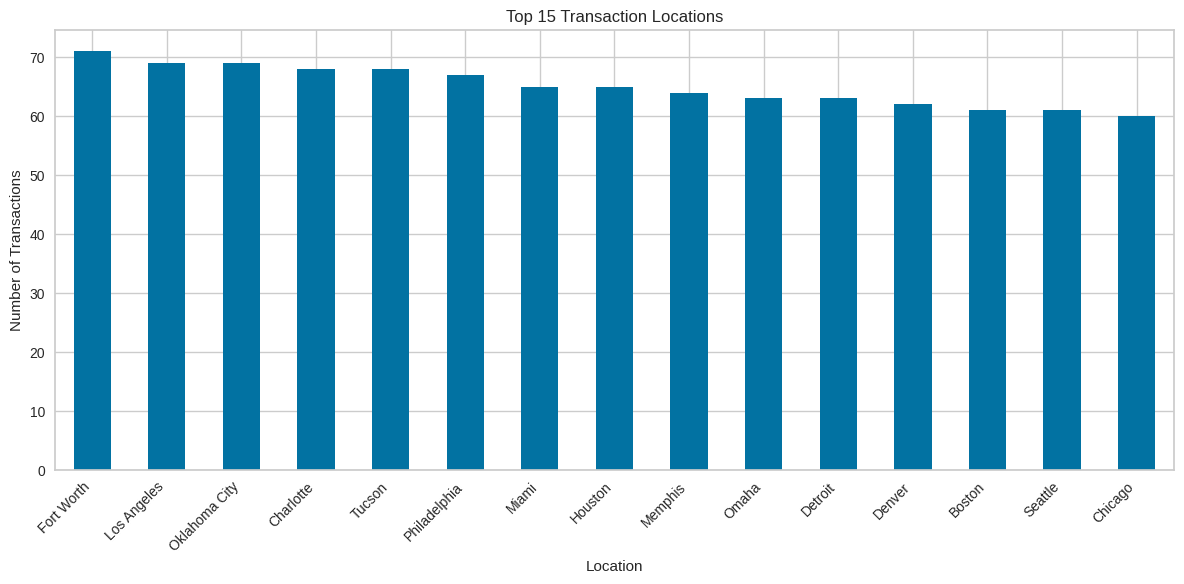

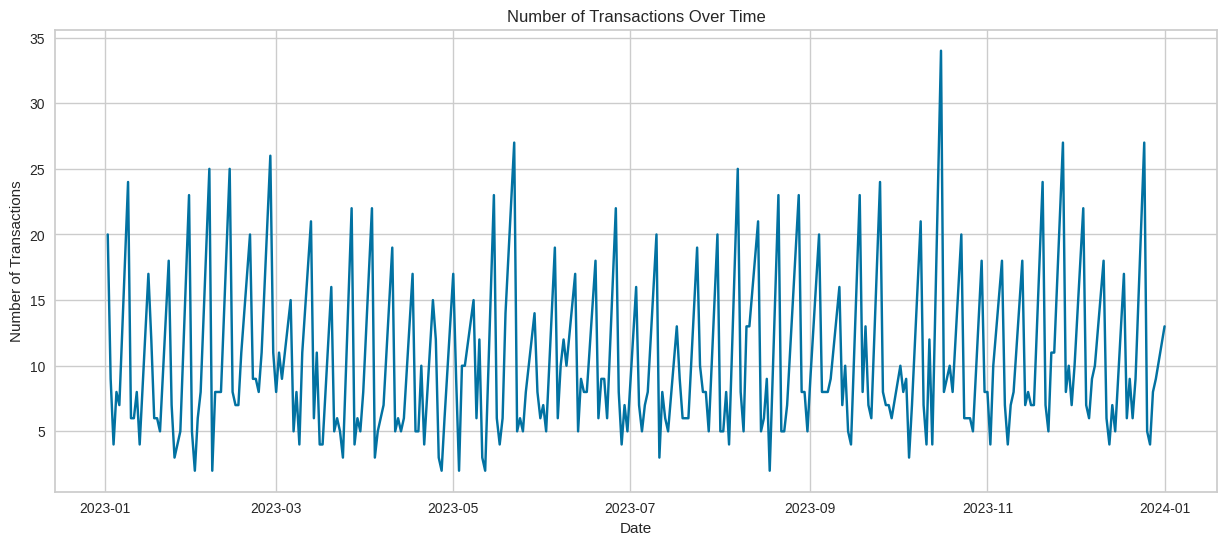

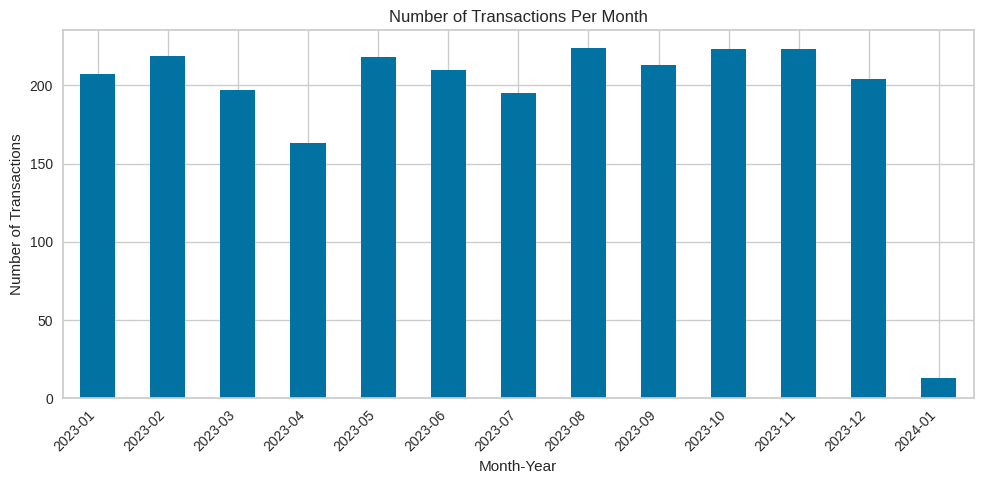

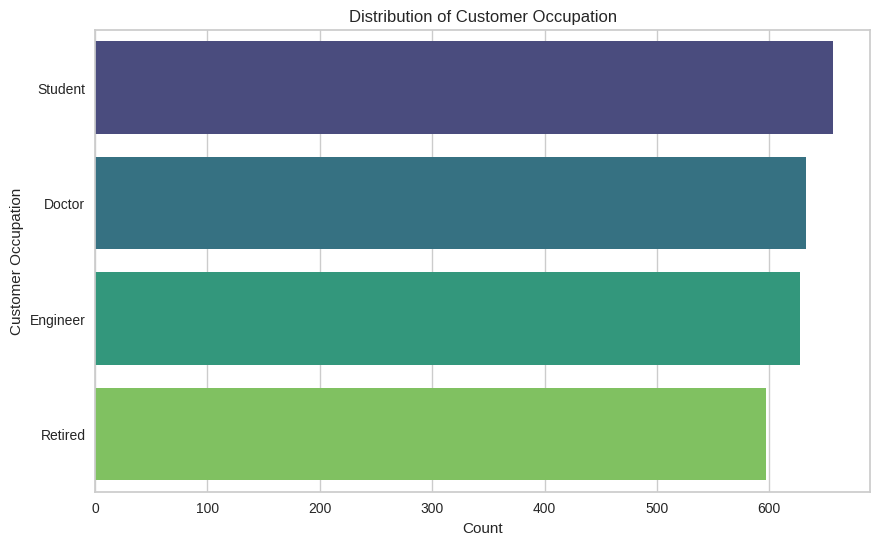

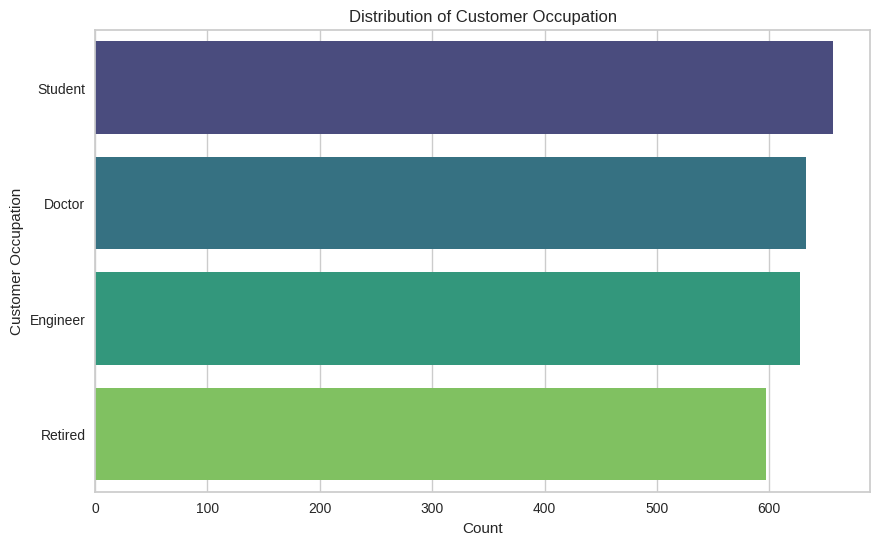

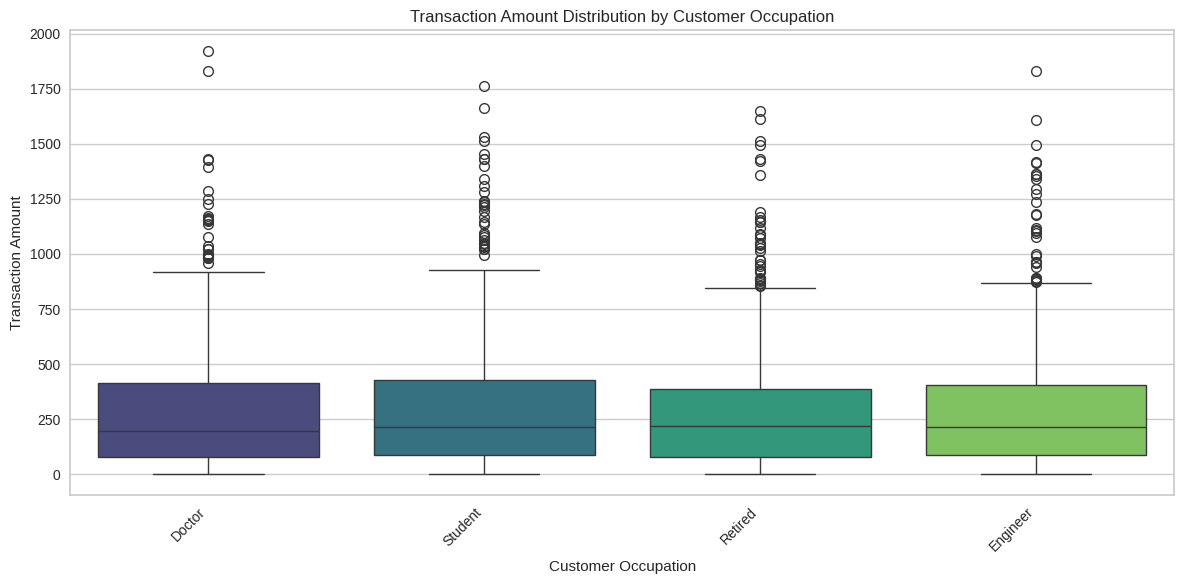

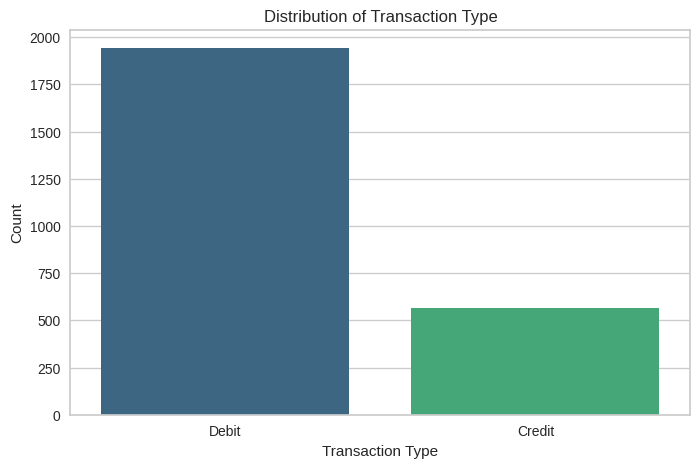

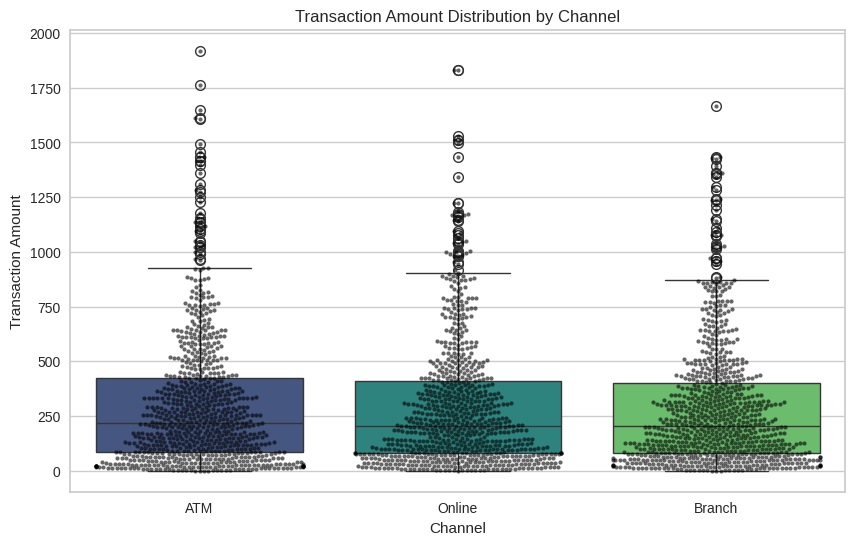

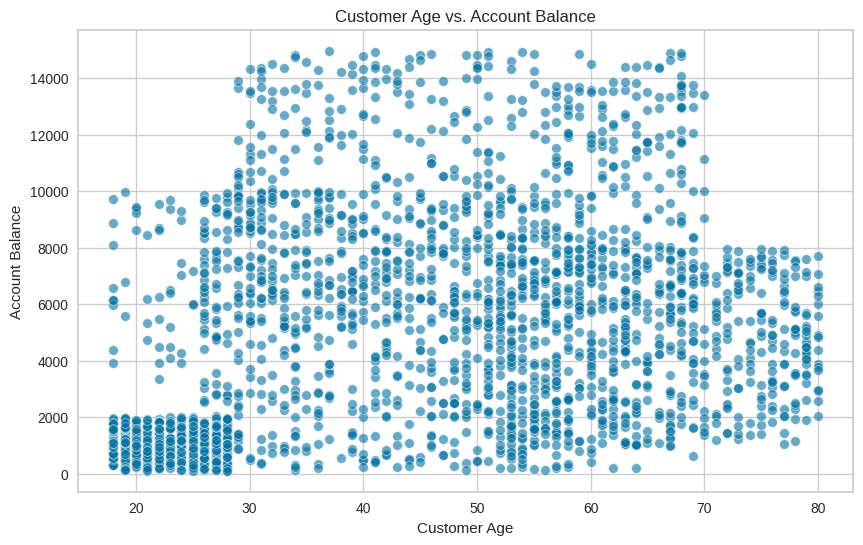

In [1280]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
# Visualisasi yang dilakukan tidak memiliki label yang overlap.

# Visualisasi informatif untuk Location
plt.figure(figsize=(12, 6))
df['Location'].value_counts().head(15).plot(kind='bar') # Ambil 15 lokasi teratas untuk kejelasan
plt.title('Top 15 Transaction Locations')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right') # Rotasi label agar tidak tumpang tindih
plt.tight_layout() # Sesuaikan layout agar pas
plt.show()


# Visualisasi informatif untuk TransactionDate (Time Series)

# Pastikan kolom tanggal bertipe datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')

# Hitung jumlah transaksi per hari
transactions_per_day = df.groupby(df['TransactionDate'].dt.date).size()

plt.figure(figsize=(15, 6))
transactions_per_day.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

# visualisasi jumlah transaksi dengan pola per bulan atau jam
df['Month_Year'] = df['TransactionDate'].dt.to_period('M')
transactions_per_month = df.groupby('Month_Year').size()
plt.figure(figsize=(10, 5))
transactions_per_month.plot(kind='bar')
plt.title('Number of Transactions Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Visualisasi Distribusi Customer Occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='CustomerOccupation', order=df['CustomerOccupation'].value_counts().index, palette='viridis')
plt.title('Distribution of Customer Occupation')
plt.xlabel('Count')
plt.ylabel('Customer Occupation')
plt.show()

# Visualisasi Distribusi Customer Occupation
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='CustomerOccupation', order=df['CustomerOccupation'].value_counts().index, palette='viridis')
plt.title('Distribution of Customer Occupation')
plt.xlabel('Count')
plt.ylabel('Customer Occupation')
plt.show()

# Hubungan Customer Occupation dan Transaction Amount menggunakan box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount', palette='viridis')
plt.title('Transaction Amount Distribution by Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisasi Distribusi Transaction Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TransactionType', palette='viridis')
plt.title('Distribution of Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

# Hubungan Channel dan Transaction Amount menggunakan box plot
plt.figure(figsize=(10, 6))
# Menambahkan jitter=True untuk mengurangi tumpang tindih titik data
sns.boxplot(data=df, x='Channel', y='TransactionAmount', palette='viridis')
sns.swarmplot(data=df, x='Channel', y='TransactionAmount', color='black', size=3, alpha=0.6) # Tambahkan swarmplot untuk menampilkan titik data dengan jitter
plt.title('Transaction Amount Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Transaction Amount')
plt.show()

# Customer Age vs. Account Balance menggunakan scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='CustomerAge', y='AccountBalance', alpha=0.6)
plt.title('Customer Age vs. Account Balance')
plt.xlabel('Customer Age')
plt.ylabel('Account Balance')
plt.grid(True)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [1281]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [1282]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [1283]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
# Identifikasi kolom numerik (jika belum dilakukan sebelumnya)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling pada kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama setelah scaling
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month_Year
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08,2023-04
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35,2023-06
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04,2023-07
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06,2023-05
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39,2023-10


In [1284]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address'], axis=1)

In [1285]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df.select_dtypes(include=['object']).columns
encoders = {}
for col in categorical_cols:
    if col != 'PreviousTransactionDate': # Hindari encoding kolom tanggal
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month_Year
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,2023-04
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,2023-06
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,2023-07
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,2023-05
4,0.006874,2023-10-16 17:51:24,0,1,2,NaN,3,0.648276,0.0,0.492591,2024-11-04 08:06:39,2023-10


In [1286]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate',
 'Month_Year']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [1287]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
df = df.dropna()

# Mengecek kembali jumlah missing values setelah dropna
print("Missing values after dropna:")
print(df.isnull().sum())

Missing values after dropna:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
Month_Year                 0
dtype: int64


In [1288]:
# Menghapus data duplikat menggunakan drop_duplicates().
df = df.drop_duplicates()

# Mengecek kembali jumlah data duplikat setelah drop_duplicates
print("Jumlah data duplikat setelah drop_duplicates:")
print(df.duplicated().sum())

Jumlah data duplikat setelah drop_duplicates:
0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [1289]:
# Melakukan Handling Outlier menggunakan metode drop atau imputasi.
# Menggunakan metode drop untuk outlier yang terdeteksi oleh IQR pada kolom 'TransactionAmount'

# Hitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus outlier
df = df[~((df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound))]

# Mengecek kembali jumlah baris setelah menghapus outlier
print(f"Jumlah baris setelah menghapus outlier: {len(df)}")

Jumlah baris setelah menghapus outlier: 2244


In [1290]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Binning CustomerAge
# Tentukan batas bin dan labelnya
age_bins = [0, 18, 35, 60, 80] # Contoh rentang usia: Anak, Dewasa Muda, Dewasa, Lanjut Usia
age_labels = ['Young_Adult', 'Adult', 'Middle_Aged', 'Senior']

# Lakukan binning
# Menggunakan .loc untuk menghindari SettingWithCopyWarning jika df adalah slice
df.loc[:, 'Age_Group'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels, right=False)

# Encode hasil binning Age_Group
le_age = LabelEncoder()
df.loc[:, 'Age_Group_Encoded'] = le_age.fit_transform(df['Age_Group'].astype(str)) # Convert to string to handle NaN/None

# Binning TransactionAmount
# Tentukan batas bin dan labelnya
# Sesuaikan bins dan labels berdasarkan distribusi data
amount_bins = [0, 0.1, 0.3, 0.6, 1] # Contoh rentang jumlah transaksi (setelah scaling)
amount_labels = ['Low', 'Medium', 'High', 'Very_High']

# Lakukan binning
# Menggunakan .loc untuk menghindari SettingWithCopyWarning jika df adalah slice
df.loc[:, 'Amount_Group'] = pd.cut(df['TransactionAmount'], bins=amount_bins, labels=amount_labels, right=False)

# Encode hasil binning Amount_Group
le_amount = LabelEncoder()
df.loc[:, 'Amount_Group_Encoded'] = le_amount.fit_transform(df['Amount_Group'].astype(str)) # Convert to string to handle NaN/None

# Tampilkan 5 baris pertama dengan kolom hasil binning dan encoding
display(df[['CustomerAge', 'Age_Group', 'Age_Group_Encoded', 'TransactionAmount', 'Amount_Group', 'Amount_Group_Encoded']].head())

# Tampilkan jumlah nilai per kategori untuk verifikasi
print("\nValue counts for Age_Group:")
print(df['Age_Group'].value_counts())

print("\nValue counts for Amount_Group:")
print(df['Amount_Group'].value_counts())

,CustomerAge,Age_Group,Age_Group_Encoded,TransactionAmount,Amount_Group,Amount_Group_Encoded
0,0.838710,Young_Adult,0,0.007207,Low,1
1,0.806452,Young_Adult,0,0.195940,Medium,2
2,0.016129,Young_Adult,0,0.065680,Low,1
3,0.129032,Young_Adult,0,0.096016,Low,1
5,0.000000,Young_Adult,0,0.047888,Low,1



Value counts for Age_Group:
Age_Group
Young_Adult    2244
Adult             0
Middle_Aged       0
Senior            0
Name: count, dtype: int64

Value counts for Amount_Group:
Amount_Group
Low          1104
Medium        897
High          243
Very_High       0
Name: count, dtype: int64


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [1291]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,Age_Group_Encoded,Amount_Group_Encoded
count,2244.000000,2244,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.000000,2244.0,2244.000000
mean,0.132469,2023-07-04 11:57:18.106506496,0.788324,21.411319,1.009804,0.431293,1.526292,0.377731,0.030192,0.338807,0.0,1.291444
min,0.000000,2023-01-02 16:00:06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.040660,2023-03-31 17:12:41,1.000000,11.000000,0.000000,0.145161,0.000000,0.182759,0.000000,0.094636,0.0,1.000000
50%,0.102705,2023-07-04 18:38:15,1.000000,21.000000,1.000000,0.435484,2.000000,0.351724,0.000000,0.313319,0.0,1.000000
75%,0.193815,2023-10-05 16:32:13,1.000000,32.000000,2.000000,0.661290,3.000000,0.524138,0.000000,0.511761,0.0,2.000000
max,0.470558,2024-01-01 18:21:50,2.000000,43.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.0,2.000000
std,0.112769,NaN,0.439092,12.426321,0.826928,0.287028,1.155237,0.243256,0.146693,0.262643,0.0,0.650592


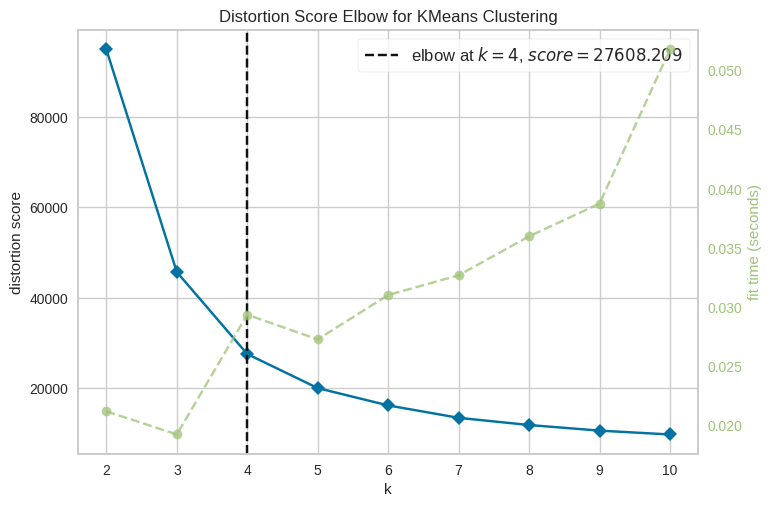

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1292]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Inisialisasi model KMeans
model = KMeans(random_state=42, n_init=10) # Tambahkan n_init untuk menghindari warning

# Inisialisasi KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,11)) # Coba rentang k dari 2 hingga 10

# Fit visualizer ke data
# Pastikan Anda mengganti 'df' dengan nama DataFrame Anda jika sudah di-preprocess
visualizer.fit(df.select_dtypes(include=['float64', 'int64'])) # Gunakan hanya kolom numerik

# Tampilkan plot elbow
visualizer.show()

In [1293]:
# Menggunakan algoritma K-Means Clustering
# Pilih jumlah cluster berdasarkan Elbow Method atau pengetahuan domain
# Ganti 'n_clusters' dengan jumlah cluster yang optimal
# Jangan menyertakan kolom 'PreviousTransactionDate' karena tidak relevan untuk clustering
# Juga hapus kolom string hasil binning yang tidak di-encode
X = df.drop(['PreviousTransactionDate', 'Age_Group', 'Amount_Group', 'TransactionDate', 'Month_Year'], axis=1)

model_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Contoh dengan 4 cluster, sesuaikan dengan hasil Elbow Method
model_kmeans.fit(X)

# Tambahkan label cluster ke DataFrame asli
df['Cluster'] = model_kmeans.labels_

# Tampilkan 5 baris pertama dengan label cluster
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month_Year,Age_Group,Age_Group_Encoded,Amount_Group,Amount_Group_Encoded,Cluster
0,0.007207,2023-04-11 16:29:14,1,36,0,0.838710,0,0.244828,0.0,0.336832,2024-11-04 08:08:08,2023-04,Young_Adult,0,Low,1,0
1,0.195940,2023-06-27 16:44:19,1,15,0,0.806452,0,0.451724,0.0,0.918055,2024-11-04 08:09:35,2023-06,Young_Adult,0,Medium,2,3
2,0.065680,2023-07-10 18:16:08,1,23,2,0.016129,3,0.158621,0.0,0.068637,2024-11-04 08:07:04,2023-07,Young_Adult,0,Low,1,2
3,0.096016,2023-05-05 16:32:11,1,33,2,0.129032,3,0.051724,0.0,0.569198,2024-11-04 08:09:06,2023-05,Young_Adult,0,Low,1,0
5,0.047888,2023-04-03 17:15:01,1,28,0,0.000000,3,0.558621,0.0,0.045738,2024-11-04 08:06:36,2023-04,Young_Adult,0,Low,1,2


Jalankan cell code ini untuk menyimpan model kamu.

In [1294]:
# Menyimpan model menggunakan joblib
joblib.dump(model_kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [1295]:
# Menghitung dan menampilkan nilai Silhouette Score.
# Hitung Silhouette Score
# Gunakan DataFrame X yang digunakan untuk clustering dan label cluster dari model_kmeans
silhouette_avg = silhouette_score(X, model_kmeans.labels_)

# Tampilkan nilai Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5050726459954096


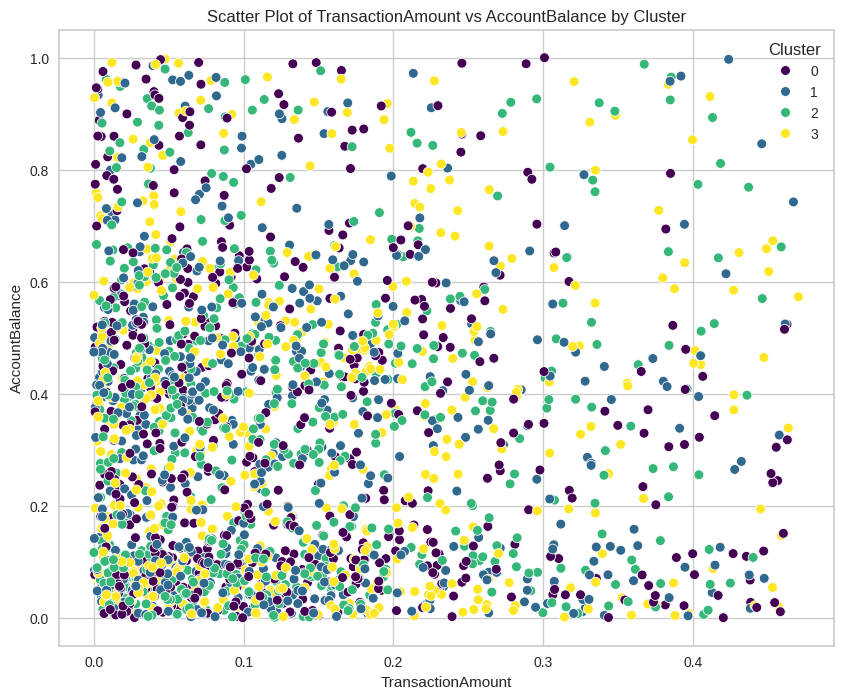

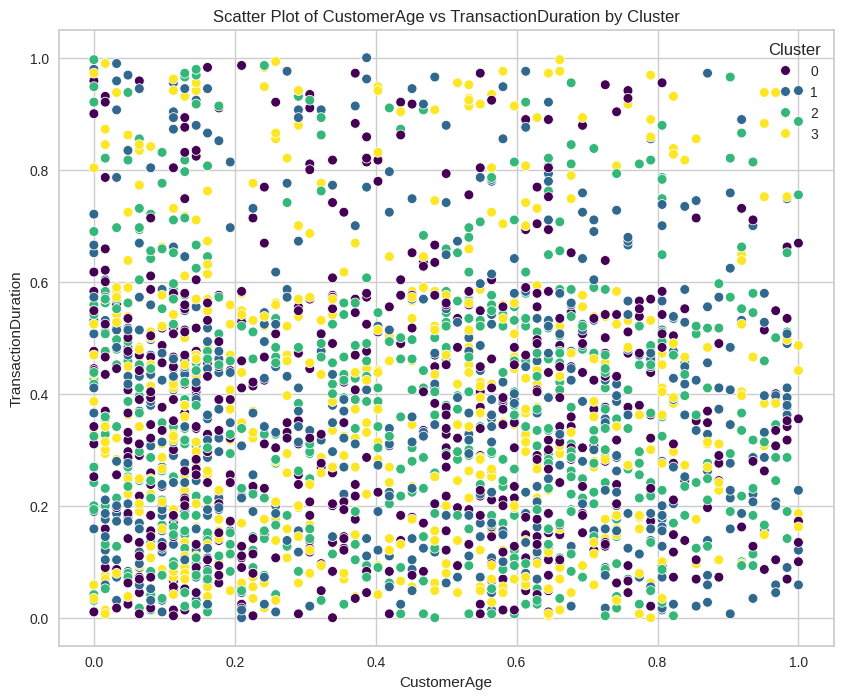

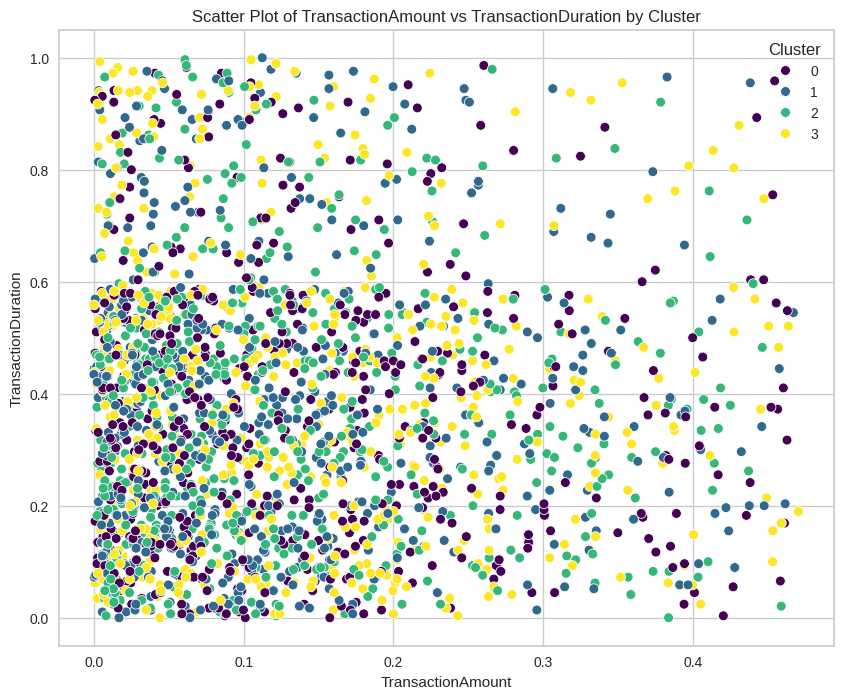

In [1296]:
# Membuat visualisasi hasil clustering

# Pilih beberapa pasangan fitur asli untuk scatter plot
# Anda bisa menyesuaikan pasangan fitur ini berdasarkan fitur yang paling informatif
feature_pairs = [
    ('TransactionAmount', 'AccountBalance'),
    ('CustomerAge', 'TransactionDuration'),
    ('TransactionAmount', 'TransactionDuration')
]

# Buat scatter plot untuk setiap pasangan fitur, diwarnai berdasarkan cluster
for x_col, y_col in feature_pairs:
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='Cluster', palette='viridis', s=50)
    plt.title(f'Scatter Plot of {x_col} vs {y_col} by Cluster')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [1297]:
# Membangun model menggunakan PCA.
# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components=2)

# Lakukan fit dan transform pada data
X_pca = pca.fit_transform(X)

# Menyimpan data PCA sebagai Dataframe
data_final = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# Inisialisasi KMeans dengan jumlah cluster yang sama seperti sebelumnya (misal 4)
model_kmeans_pca = KMeans(n_clusters=4, random_state=42, n_init=10)

# Latih model KMeans pada data hasil PCA
model_kmeans_pca.fit(data_final)

# Tambahkan label cluster dari model PCA ke DataFrame hasil PCA
data_final['Cluster_PCA'] = model_kmeans_pca.labels_

# Tampilkan 5 baris pertama DataFrame hasil PCA dengan label cluster
display(data_final.head())

,PCA1,PCA2,Cluster_PCA
0,14.588039,-1.539833,3
1,-6.411916,-1.646359,2
2,1.588972,1.541397,1
3,11.588932,1.458850,3
4,6.587091,1.530754,1


In [1298]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [1299]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

# Pilih kolom numerik yang relevan untuk analisis deskriptif
numerical_cols_for_analysis = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Lakukan grouping berdasarkan cluster dan hitung statistik deskriptif
cluster_summary = df.groupby('Cluster')[numerical_cols_for_analysis].agg(['mean', 'min', 'max'])

# Tampilkan hasilnya
print(cluster_summary)

        TransactionAmount                     CustomerAge            \
                     mean       min       max        mean  min  max   
Cluster                                                               
0                0.133065  0.000599  0.463168    0.407556  0.0  1.0   
1                0.129825  0.000031  0.467223    0.449443  0.0  1.0   
2                0.128799  0.000000  0.459046    0.445117  0.0  1.0   
3                0.138654  0.000099  0.470558    0.423150  0.0  1.0   

        TransactionDuration                LoginAttempts            \
                       mean  min       max          mean  min  max   
Cluster                                                              
0                  0.367221  0.0  0.986207      0.021515  0.0  1.0   
1                  0.379317  0.0  1.000000      0.029545  0.0  1.0   
2                  0.372237  0.0  0.996552      0.032423  0.0  1.0   
3                  0.393771  0.0  0.996552      0.037951  0.0  1.0   

        Acc

## Menjelaskan Karakteristik Tiap Cluster Berdasarkan Rentangnya

### 1. **Cluster 0: (Nasabah Muda dengan Aktivitas Login Rendah)**
- **Rata-rata (mean) TransactionAmount:** 0.133065 (rendah dibanding cluster lain)
- **Rata-rata (mean) CustomerAge:** 0.407556 (lebih muda)
- **Rata-rata (mean) TransactionDuration:** 0.367221 (relatif singkat)
- **Rata-rata (mean) LoginAttempts:** 0.021515 (paling rendah)
- **Rata-rata (mean) AccountBalance:** 0.339069 (sedang)
- **Analisis:**  
  Cluster ini berisi nasabah yang cenderung lebih muda dan memiliki nominal transaksi serta durasi transaksi yang lebih pendek. Aktivitas login sangat rendah, menunjukkan perilaku pasif atau hanya sesekali menggunakan layanan. Mungkin ini termasuk pengguna baru atau jarang aktif.
- **Rekomendasi:**  
  Berikan promosi menarik untuk meningkatkan keterlibatan, seperti cashback kecil, edukasi fitur layanan, atau insentif login rutin.

---

### 2. **Cluster 1: (Nasabah Dewasa dengan Aktivitas Login Moderat)**
- **Rata-rata (mean) TransactionAmount:** 0.129825 (paling rendah)
- **Rata-rata (mean) CustomerAge:** 0.449443 (paling tinggi)
- **Rata-rata (mean) TransactionDuration:** 0.379317 (menengah)
- **Rata-rata (mean) LoginAttempts:** 0.029545 (menengah)
- **Rata-rata (mean) AccountBalance:** 0.332987 (rendah)
- **Analisis:**  
  Nasabah pada cluster ini tergolong usia dewasa dan login dengan intensitas sedang. Meski transaksinya kecil, mereka konsisten dan tidak impulsif. Cenderung stabil dalam penggunaan layanan.
- **Rekomendasi:**  
  Tawarkan produk perbankan jangka panjang, program loyalitas, atau edukasi literasi keuangan yang sesuai dengan kelompok usia matang.

---

### 3. **Cluster 2: (Nasabah Dewasa yang Aktif Digital)**
- **Rata-rata (mean) TransactionAmount:** 0.128799 (terendah kedua)
- **Rata-rata (mean) CustomerAge:** 0.445117 (dewasa)
- **Rata-rata (mean) TransactionDuration:** 0.372237 (menengah)
- **Rata-rata (mean) LoginAttempts:** 0.032423 (cukup aktif)
- **Rata-rata (mean) AccountBalance:** 0.336122 (sedang)
- **Analisis:**  
  Cluster ini terdiri dari pengguna dewasa yang cukup aktif secara digital, ditunjukkan dari frekuensi login yang lebih tinggi dibanding cluster lain. Transaksi tidak besar, namun aktivitasnya menjanjikan.
- **Rekomendasi:**  
  Perkuat fitur digital dan mobile banking, berikan reward login harian, atau edukasi layanan online yang meningkatkan kenyamanan mereka.

---

### 4. **Cluster 3: (Nasabah Paling Aktif dan Seimbang)**
- **Rata-rata (mean) TransactionAmount:** 0.138654 (tertinggi)
- **Rata-rata (mean) CustomerAge:** 0.423150 (menengah)
- **Rata-rata (mean) TransactionDuration:** 0.393771 (terlama)
- **Rata-rata (mean) LoginAttempts:** 0.037951 (tertinggi)
- **Rata-rata (mean) AccountBalance:** 0.347579 (tertinggi)
- **Analisis:**  
  Ini adalah cluster dengan tingkat aktivitas tertinggi di semua dimensi: transaksi, login, durasi, dan saldo. Menunjukkan potensi loyalitas dan daya beli yang kuat.
- **Rekomendasi:**  
  Fokuskan promosi produk premium, layanan eksklusif, dan program loyalitas jangka panjang untuk mempertahankan nasabah bernilai tinggi ini.

---


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [1300]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

# Tampilkan kolom untuk verifikasi
print(df.columns.tolist())

['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'Month_Year', 'Age_Group', 'Age_Group_Encoded', 'Amount_Group', 'Amount_Group_Encoded', 'Target']


In [1301]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [1302]:
# inverse dataset ke rentang normal untuk numerikal
numerical_cols_scaled = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'] # Sesuaikan jika ada kolom numerik lain yang di-scale
df[numerical_cols_scaled] = scaler.inverse_transform(df[numerical_cols_scaled])

# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month_Year,Age_Group,Age_Group_Encoded,Amount_Group,Amount_Group_Encoded,Target
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,2023-04,Young_Adult,0,Low,1,0
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,2023-06,Young_Adult,0,Medium,2,3
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,2023-07,Young_Adult,0,Low,1,2
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,2023-05,Young_Adult,0,Low,1,0
5,92.15,2023-04-03 17:15:01,1,28,0,18.0,3,172.0,1.0,781.68,2024-11-04 08:06:36,2023-04,Young_Adult,0,Low,1,2


In [1303]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)

# Identifikasi kolom kategorikal yang sudah diencode (sesuai dengan yang digunakan saat encoding)
# Pastikan Anda memiliki dictionary 'encoders' yang menyimpan encoder untuk setiap kolom
categorical_cols_encoded = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation'] # Sesuaikan jika ada kolom kategorikal lain yang diencode dengan LabelEncoder

# Lakukan inverse transform untuk setiap kolom kategorikal
# Pastikan Anda melakukan ini pada DataFrame yang sudah di-inverse numeriknya atau salinannya jika Anda ingin menjaga data asli
# Menggunakan 'df' yang sudah di-inverse numeriknya di cell sebelumnya
for col in categorical_cols_encoded:
    if col in encoders: # Pastikan encoder untuk kolom ini ada
        le = encoders[col]
        # Handle kemungkinan NaN/None sebelum inverse transform dengan mengonversi ke string, lalu inverse, lalu kembali ke tipe asli jika memungkinkan
        # Atau bisa juga mengabaikan NaN jika ada
        df[col] = le.inverse_transform(df[col].astype(int)) # Asumsi nilai ter-encode adalah integer

# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month_Year,Age_Group,Age_Group_Encoded,Amount_Group,Amount_Group_Encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2023-04,Young_Adult,0,Low,1,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2023-06,Young_Adult,0,Medium,2,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2023-07,Young_Adult,0,Low,1,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2023-05,Young_Adult,0,Low,1,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,2023-04,Young_Adult,0,Low,1,2


In [1304]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Pilih kolom numerik yang relevan untuk analisis deskriptif
numerical_cols_for_analysis_inverse = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Pilih kolom kategorikal yang relevan untuk analisis deskriptif (setelah inverse encoding jika dilakukan)
# Karena Anda sudah melakukan inverse encoding untuk kolom kategorikal di cell sebelumnya, kita akan analisis berdasarkan nilai aslinya
categorical_cols_for_analysis_inverse = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation', 'Age_Group', 'Amount_Group']


# Lakukan grouping berdasarkan cluster dan hitung statistik deskriptif untuk kolom numerik
cluster_summary_inverse_numeric = df.groupby('Target')[numerical_cols_for_analysis_inverse].agg(['mean', 'min', 'max'])

# Tampilkan hasilnya untuk kolom numerik
print("Analisis Deskriptif Numerik Setelah Inverse Transform:")
print(cluster_summary_inverse_numeric)

# Lakukan grouping berdasarkan cluster dan temukan mode untuk kolom kategorikal
print("\nAnalisis Deskriptif Kategorikal (Mode) Setelah Inverse Transform:")
for col in categorical_cols_for_analysis_inverse:
    print(f"\nMode untuk '{col}' per Cluster:")
    # Hitung mode (nilai paling sering muncul) per cluster
    # Menggunakan .mode() yang mengembalikan Series/DataFrame, ambil nilai pertama jika ada multiple modes
    cluster_mode = df.groupby('Target')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
    print(cluster_mode)

Analisis Deskriptif Numerik Setelah Inverse Transform:
       TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             255.591291  1.41  889.01   43.268503  18.0  80.0   
1             249.374236  0.32  896.79   45.865455  18.0  80.0   
2             247.405324  0.26  881.10   45.597270  18.0  80.0   
3             266.315275  0.45  903.19   44.235294  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               116.493976  10.0  296.0      1.086059  1.0  5.0   
1               120.001818  10.0  300.0      1.118182  1.0  5.0   
2               117.948805  10.0  299.0      1.129693  1.0  5.0   
3               124.193548  10.0  299.0      1.151803  1.0  5.0   

       Accou

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

1. **Cluster 0: (Nasabah Muda, Transaksi Rendah, dan Login Pasif)**
  - **Rata-rata (mean) TransactionAmount:** 0.133065 → 255.59
  - **Rata-rata (mean) CustomerAge:** 0.407556 → 43.27
  - **Rata-rata (mean) TransactionDuration:** 0.367221 → 116.49
  - **Rata-rata (mean) LoginAttempts:** 0.021515 → 1.09
  - **Rata-rata (mean) AccountBalance:** 0.339069 → 5,145.49
  - **Analisis:** Cluster ini terdiri dari nasabah berusia muda dengan nominal transaksi rendah, aktivitas login paling sedikit, dan saldo sedang. Transaksi dilakukan secara langsung di cabang. Mereka termasuk segmen yang pasif dan kurang terlibat secara digital.

2. **Cluster 1: (Mahasiswa Dewasa, Transaksi Kecil tapi Cukup Aktif)**
  - **Rata-rata (mean) TransactionAmount:** 0.129825 → 249.37
  - **Rata-rata (mean) CustomerAge:** 0.449443 → 45.87
  - **Rata-rata (mean) TransactionDuration:** 0.379317 → 120.00
  - **Rata-rata (mean) LoginAttempts:** 0.029545 → 1.12
  - **Rata-rata (mean) AccountBalance:** 0.332987 → 5,055.01
  - **Analisis:** Cluster ini berisi pengguna dewasa muda dengan latar belakang pelajar. Meskipun nilai transaksi kecil, mereka cukup aktif dalam login dan memiliki saldo rendah. Cenderung melakukan transaksi di cabang fisik, dan bisa ditingkatkan melalui layanan digital.

3. **Cluster 2: (Nasabah Pensiunan, Pengguna Aktif dengan Transaksi Kecil)**
  - **Rata-rata (mean) TransactionAmount:** 0.128799 → 247.41
  - **Rata-rata (mean) CustomerAge:** 0.445117 → 45.60
  - **Rata-rata (mean) TransactionDuration:** 0.372237 → 117.95
  - **Rata-rata (mean) LoginAttempts:** 0.032423 → 1.13
  - **Rata-rata (mean) AccountBalance:** 0.336122 → 5,101.65
  - **Analisis:** Cluster ini terdiri dari pengguna dewasa dengan dominasi pensiunan. Meskipun nilai transaksi dan saldo rendah, aktivitas login cukup aktif. Potensial untuk dipertahankan melalui loyalty program atau layanan nasabah senior.

4. **Cluster 3: (Nasabah Dokter Aktif dengan Saldo dan Transaksi Tertinggi)**
  - **Rata-rata (mean) TransactionAmount:** 0.138654 → 266.32
  - **Rata-rata (mean) CustomerAge:** 0.423150 → 44.24
  - **Rata-rata (mean) TransactionDuration:** 0.393771 → 124.19
  - **Rata-rata (mean) LoginAttempts:** 0.037951 → 1.15
  - **Rata-rata (mean) AccountBalance:** 0.347579 → 5,272.09
  - **Analisis:** Cluster ini mencakup nasabah paling aktif dan paling bernilai, dengan frekuensi login tertinggi, nominal transaksi dan saldo paling tinggi, serta pekerjaan sebagai dokter. Mereka adalah target ideal untuk layanan premium dan penawaran eksklusif.



(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [1305]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
display(df.head())

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Month_Year,Age_Group,Age_Group_Encoded,Amount_Group,Amount_Group_Encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,2023-04,Young_Adult,0,Low,1,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,2023-06,Young_Adult,0,Medium,2,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2023-07,Young_Adult,0,Low,1,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2023-05,Young_Adult,0,Low,1,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,2023-04,Young_Adult,0,Low,1,2


In [1306]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.